In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

#### Framework of model buillding

** exploratory Data Analysis**

    * univariate analysis
    * bivariate analysis
    * missing value imputation
    * outlier analysis and treatment
    * feature engineering
    * statistical hypothesis testing
    * categorical variable analysis encoding
    * scaling and Transformation
    
note : post eda yu have entered the pre modelling stage.

**Models**

    
    * base models - average in case of linear regression
    *in cases oof classificatio - highest frequency 
    * Linear regressioon 
    * tree based models - decision tree, randomforest,
    gradient boosting machines etc.
    * remember that all the models shall be cross validated models.
    

In [4]:
# combine the train and test set 

combined = pd.concat([train,test],ignore_index=True)
combined.shape,train.shape,test.shape

((14204, 12), (8523, 12), (5681, 11))

### Univariate Analysis

* It Represents single variable analysis
* num vars: Distplot/histogram
* cat vars: Countplot


In [5]:
# lets pull the list of numerical variable...
nums = combined.select_dtypes(include = np.number).columns
cats = combined.select_dtypes(exclude = np.number).columns

In [6]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
cats = combined.select_dtypes(exclude = np.number).columns

In [8]:
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

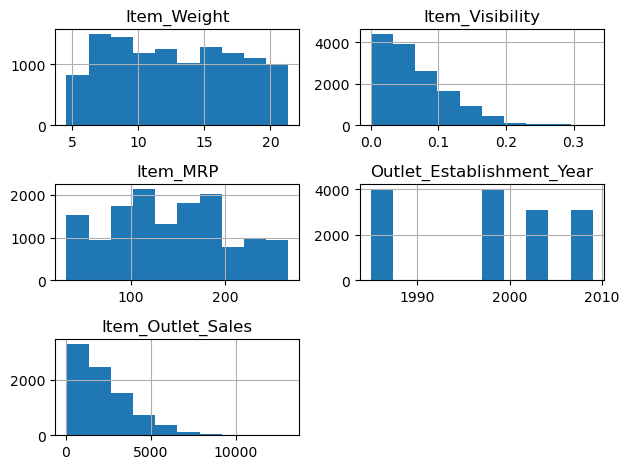

In [9]:
plt.figure(figsize=(15,10))
combined.loc[:,nums].hist()
plt.tight_layout()
plt.show()

In [10]:
# outlet establishment year  -- is categorical 
# sales is positively skews 

<Axes: xlabel='Item_MRP', ylabel='Density'>

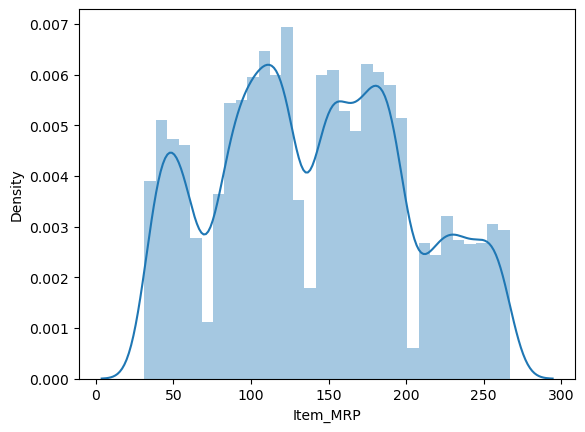

In [11]:
sns.distplot(combined.Item_MRP)

# multiple peaks means multimodal data 

In [12]:
combined.loc[:,nums].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# summary m kisi bhi numberical standard deviation of column will never be zero 
# agar aisa ho to column koi kaam ka nhi h usme skewness , distribution nhi hota 
# negative m inliers hote h positive m outlier

In [14]:
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

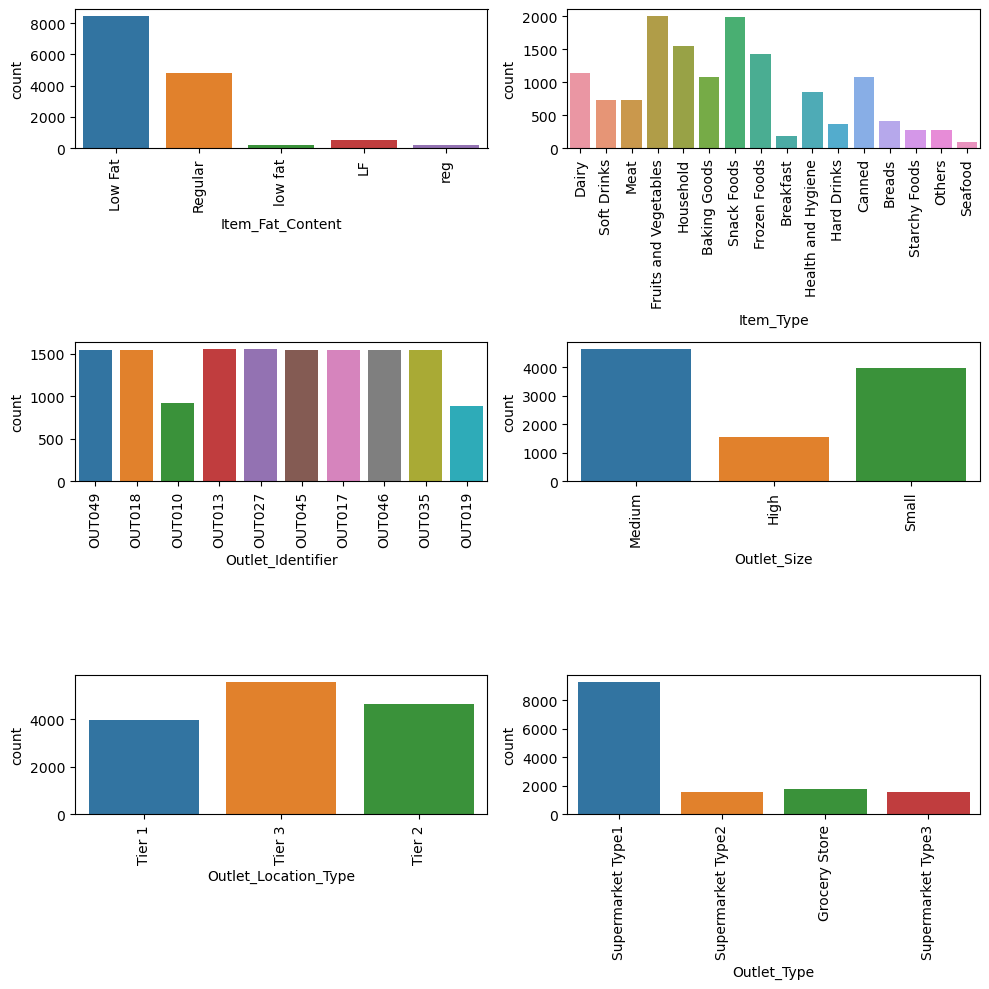

In [42]:
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(x =i,data=combined)
    iterator +=1
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()
    

In [31]:
# before removing any product you must take a servey and take better descision

In [34]:
combined['Outlet_Identifier'].value_counts().sort_values(ascending=False)

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [15]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

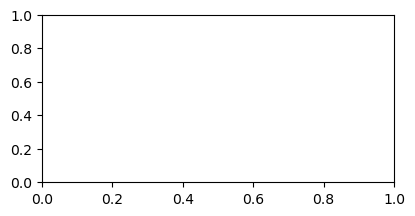

In [21]:
plt.figure(figsize=(10,10))
t=1
for i in cats:
    plt.subplot(4,2,t)
    sns.boxplot(x=[i],data=combined)
    t+=1
plt.tight_layout()
plt.show()

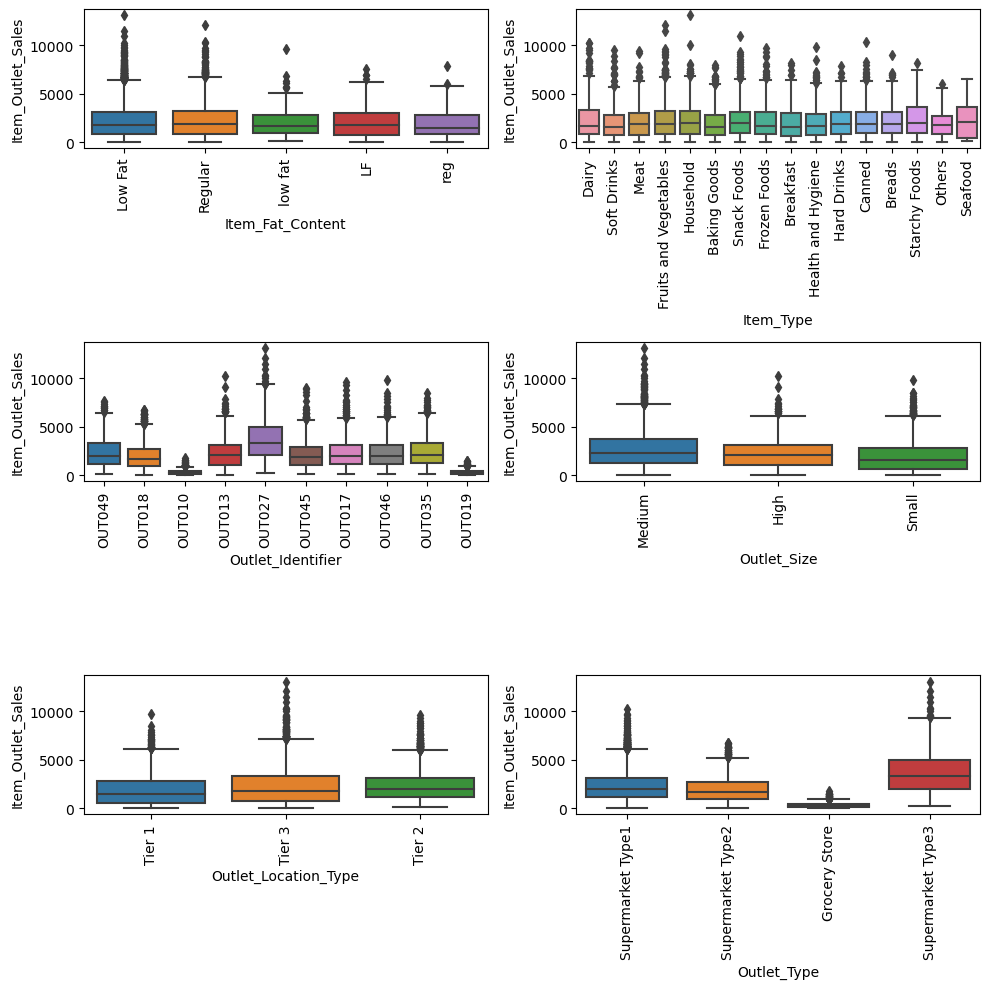

In [44]:
# bivariate Analysis
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x = combined.loc[:,i],y=combined.Item_Outlet_Sales)
    plt.xticks(rotation=90)
    iterator +=1
    
plt.tight_layout()
plt.show()
    

In [45]:
combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                 value = ['Low Fat',
                                         'Low Fat', 'Regular'], 
                                  inplace = True)

In [49]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

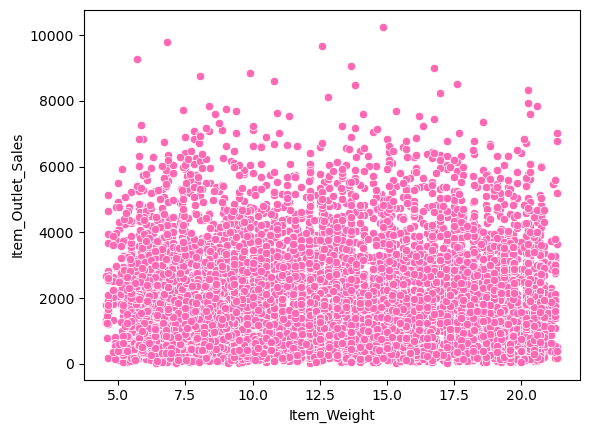

In [50]:
sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales",
               data = combined, color = "hotpink")
plt.show()

In [51]:
# pull the dataframe where item weight is  missing
combined.loc[combined.Item_Weight.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [52]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


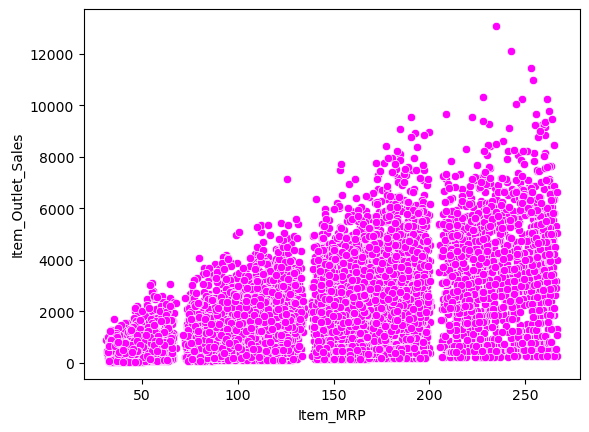

In [53]:
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales",
               data = combined, color = "magenta")
plt.show()

In [54]:
# since we kwo that mrp is combined and thus we see a combined effect of sales 
#that the mrp is multimodel data which leads to multiple transection combined togather hence we can conclude that there is a combination
# effect on mrp vs. sales

In [55]:
# Dictionary...

# mapped = combined.groupby("Item_Identifier")["Item_Weight"].mean().to_dict()

In [56]:
# Impute the Missing Values
combined["Item_Weight"] = combined.groupby("Item_Identifier")["Item_Weight"]\
.apply(lambda x:x.fillna(x.mean()))

In [57]:
combined["Item_Weight"].isnull().sum()

0

In [58]:
# Impute the Missing Values
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0,
                                             value = x.mean()))

In [60]:
combined["Item_Visibility"].isnull().sum()

0

In [66]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [62]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [63]:
combined.groupby(["Outlet_Identifier", "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [64]:
combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"]="Small"

In [65]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [67]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [69]:
combined['Item_IDS'] = pd.Series(ids)

In [70]:
perish = ['Dairy','Meat', 'Fruits and Vegetables',
         'Breakfast''Breads', 'Starchy Foods','Seafood']

In [71]:
def badaldo(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non_Perishables")

In [72]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(badaldo)

<Axes: xlabel='Item_Type_Cat', ylabel='Item_Outlet_Sales'>

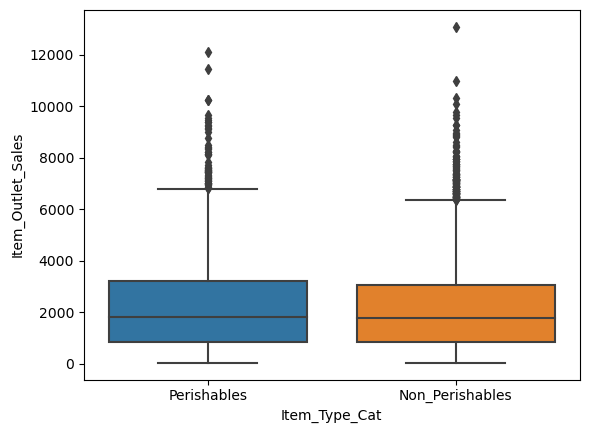

In [73]:
# Pattern between Item Type Cat vs Sales

sns.boxplot(x = "Item_Type_Cat", y  ="Item_Outlet_Sales",
           data = combined)

In [74]:
combined.loc[combined.Item_IDS=="NC", 
             "Item_Fat_Content"]="Non_Edible"

In [75]:
# Outlets.
top = ["OUT027", "OUT013"]
worst = ["OUT010", "OUT019"]

def outlets(x):
    if x in top:
        return("Best")
    elif x in worst:
        return("Worst")
    else:
        return("Good")

In [76]:
combined["Outlets"] = combined.Outlet_Identifier.apply(outlets)

<Axes: xlabel='Outlets', ylabel='Item_Outlet_Sales'>

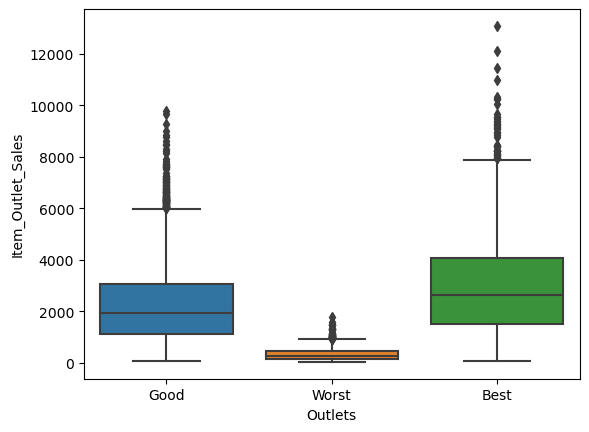

In [78]:
sns.boxplot(x = 'Outlets', y  ="Item_Outlet_Sales",
           data = combined)

In [79]:
# Drop the Unnecessary Columns now
combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis =1, 
              inplace = True)

In [80]:
combined.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_Cat,Outlets
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Good
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,Good


In [81]:
# Outlet Size
mapped_size = {"Medium":3, "High":2, "Small":1}
mapped_outlet = {"Best":3, "Good":2, "Worst":1}
mapped_loc = {"Tier 3":3, "Tier 1":2, "Tier 2":1}

#combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

In [82]:
combined["Outlet_Size"] = combined["Outlet_Size"].map(mapped_size)
combined["Outlets"] = combined["Outlets"].map(mapped_outlet)
combined["Outlet_Location_Type"] = combined["Outlet_Location_Type"].map(mapped_loc)

In [83]:
# one hot encoding
dummy = pd.get_dummies(combined, drop_first = True)

In [85]:
# Split the Data into Train and Test
newtrain = dummy.loc[0:train.shape[0]-1, ]
newtest = dummy.loc[train.shape[0]:, ]

In [86]:
# Drop the Target from the Test set
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

### Model building

In [87]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [88]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales

lr = LinearRegression()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    # Model
    pred = lr.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [89]:
finalpred = pd.DataFrame(predictions).T.mean(axis=1)

In [90]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [ ]:
# export it as csv
submission.to_csv('LRmodel_bigmart.csv',index=False)